In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filePathGMM = "../../dataframes/experiment2.1/MG_3_components_3.csv"
filePathBNN = "../../dataframes/experiment2.1/BNN_2.csv"

In [193]:
def load_df(filePath):
    df = pd.read_csv(filePath, usecols=["split", "faint", "Z", "Z_pred", "Z_pred_std", "Z_spec_prob"])
    df = df.loc[df["split"]=="test"].sort_values(by="Z_pred_std", ascending=False)
    df_test = df.loc[~df["faint"]]
    df_faint = df.loc[df["faint"]]
    return df_test, df_faint

def calculate_nll(probs):
    return -np.log(np.clip(probs, 1e-12, None)).mean()

def calculate_percentiles(stds):
    return np.percentile(stds, np.arange(0,101,1))

def plot_nll_vs_std(gmm_cut_offs, gmm_nlls, bnn_cut_offs=None, bnn_nlls=None, dataset="Random Test"):
    plt.plot(gmm_cut_offs, gmm_nlls, label="GMM")
    plt.plot(bnn_cut_offs, bnn_nlls, label="BNN")
    plt.xlabel("Max Z_pred_std")
    plt.ylabel("Negative Log Likelihood")
    plt.title(f"{dataset} Dataset")
    plt.legend()
    plt.grid()
    plt.show()

def plot_nll_vs_cov(gmm_nlls, bnn_nlls=None, dataset="Random Test"):
    plt.plot(gmm_nlls[::-1], label="GMM")
    plt.plot(bnn_nlls[::-1], label="BNN")
    plt.xlabel("Coverage %")
    plt.ylabel("Negative Log Likelihood")
    plt.title(f"{dataset} Dataset")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate(df_gmm, df_bnn, dataset):
    cut_offs_gmm = calculate_percentiles(df_gmm["Z_pred_std"])[::-1]
    cut_offs_bnn = calculate_percentiles(df_bnn["Z_pred_std"])[::-1]
    
    nlls_gmm = [calculate_nll(df_gmm.loc[df_gmm["Z_pred_std"] <= cut_offs_gmm[i], "Z_spec_prob"]) for i in range(0,101)]
    nlls_bnn = [calculate_nll(df_bnn.loc[df_bnn["Z_pred_std"] <= cut_offs_bnn[i], "Z_spec_prob"]) for i in range(0,101)]
    
    plot_nll_vs_std(cut_offs_gmm, nlls_gmm, cut_offs_bnn, nlls_bnn, dataset=dataset)
    plot_nll_vs_cov(nlls_gmm, nlls_bnn, dataset=dataset)  

------ Random Test ------


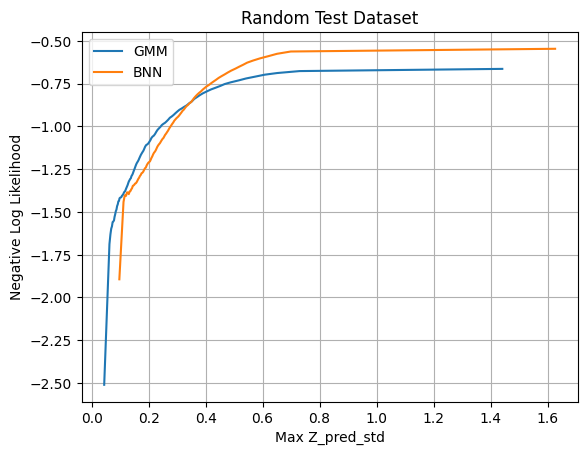

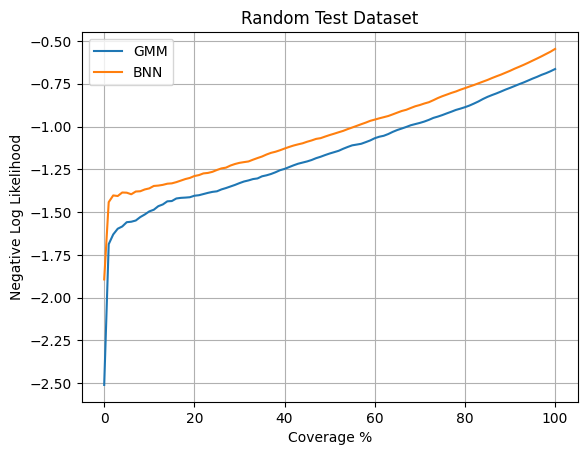

------ Faint test ------


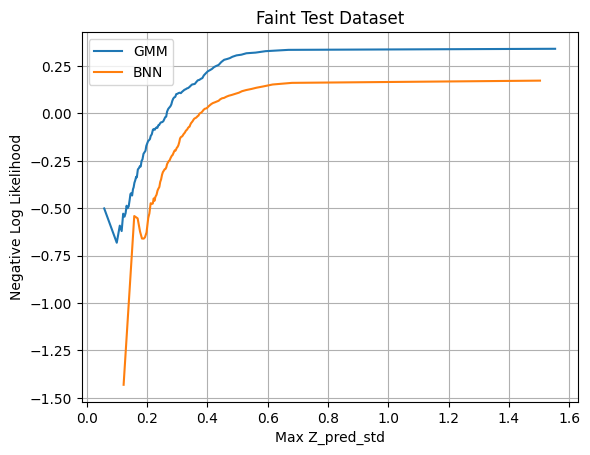

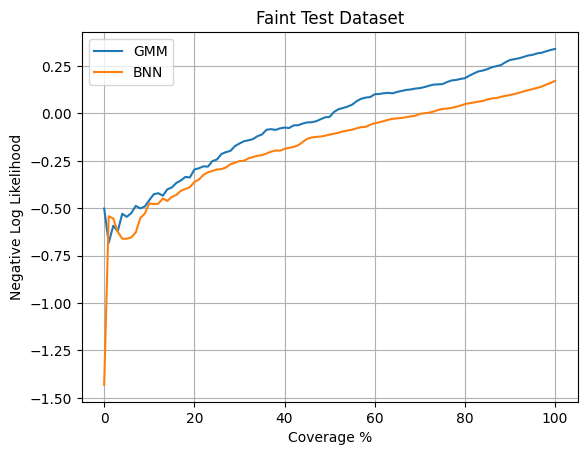

In [194]:
df_test_gmm, df_faint_gmm = load_df(filePathGMM)
df_test_bnn, df_faint_bnn = load_df(filePathBNN)

print("------ Random Test ------")
evaluate(df_test_gmm, df_test_bnn, "Random Test")
print("------ Faint test ------")
evaluate(df_faint_gmm, df_faint_bnn, "Faint Test")